## References
* Dataset - https://www.kaggle.com/c/digit-recognizer

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import sqlite3
import pickle
from sklearn.utils import shuffle 


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split# for shuffle = false
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score


from sklearn.metrics import confusion_matrix

In [2]:
#Read the data
data=pd.read_csv('train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#sampling the dataset
x=data.iloc[:20000,1:786].values
y=data.iloc[:20000,0].values

In [5]:
print(x[:5,:])
print(y[:5])
x.shape

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[1 0 1 4 0]


(20000, 784)

In [6]:
s=StandardScaler()
x=s.fit_transform(x)
x[:5,:]

C:\Users\vipul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

**CV**

In [8]:
#train-cv-test split
x_1, x_test, y_1, y_test = train_test_split(x, y, test_size = 0.35, shuffle=False)
x_train, x_cv, y_train, y_cv = train_test_split(x_1, y_1, test_size = 0.3, shuffle=False)


The optimal number of neighbors is 5.


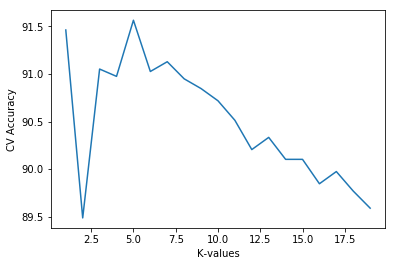

In [9]:
#code to find value of k
k_list = list(range(1,20))
acc_list = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k) #create an object of KNN
    classifier.fit(x_train, y_train) #fitting the model on training data
    y_pred = classifier.predict(x_cv)    #generating predictions on CV data
    acc_list.append(accuracy_score(y_cv, y_pred, normalize=True) * float(100)) #appending acc on the list
optimal_k = k_list[acc_list.index(max(acc_list))] #return the optimal value of k
print('\nThe optimal number of neighbors is %d.' % optimal_k)
plt.plot(k_list, acc_list)
plt.xlabel('K-values')
plt.ylabel('CV Accuracy')
plt.show()

In [10]:
#fitting the model on optimal value of k
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
#generating prediction
y_pred = classifier.predict(x_test)

In [12]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)
acc

91.314285714285717

In [13]:
results = confusion_matrix(y_test, y_pred)
print(results)

[[645   0   1   1   1   4   3   1   2   0]
 [  0 806   1   0   1   1   2   0   0   0]
 [  5  13 605  14   5   1   9  12  15   2]
 [  6   8  10 695   2  19   1  13   8   4]
 [  0  18   9   1 628   3   4   1   1  36]
 [  4   6   2  28   3 542   7   2   5   8]
 [ 13   5   3   1   0   5 641   0   2   0]
 [  1  17   6   3   5   1   0 654   0  37]
 [ 15  19  10  16   7  31   7   2 553  12]
 [  6   1   4   6  30   4   0  33   3 623]]


**k-fold**

In [14]:
#train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, shuffle=False)


The optimal number of neighbors is 5.


Text(0,0.5,'Misclassification Error')

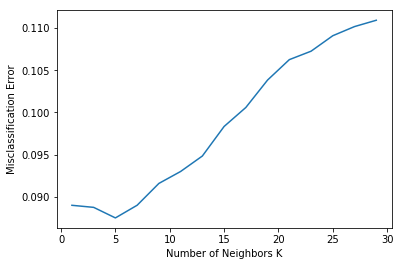

In [16]:
neighbor = list(range(1,30,2))
cv_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')#hyper paramter -cv
    cv_score.append(score.mean())


MSE = [1 - x for x in cv_score]

optimal_k = neighbor[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)
plt.plot(neighbor, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

In [17]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
y_pred = classifier.predict(x_test)

In [19]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)
acc

91.9375

In [20]:
results = confusion_matrix(y_test, y_pred)
print(results)

[[752   0   1   1   0   4   1   1   0   1]
 [  0 911   2   0   1   1   2   0   0   1]
 [  6   9 689  20   3   1  11  13  12   3]
 [  7   5  10 790   1  26   1  10  13   4]
 [  0  23   9   2 725   3   6   3   1  40]
 [  3   5   2  24   7 628   8   2   4   6]
 [ 12   3   2   1   2   8 736   1   3   0]
 [  1  17   8   4   4   1   1 761   0  40]
 [ 13  20   8  18   5  36   6   5 651  11]
 [  9   3   6   7  29   4   0  35   3 712]]


* As you can see both the ways of representing the data returns almost the same result .